# EDA and Data cleaning on Housing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import multiprocessing
import seaborn as sns
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv("raw_house_data.csv",header='infer')

In [ ]:
df.head(2)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.0,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.0,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0



The dataset appears to contain real estate listings with various attributes.

MLS (Multiple Listing Service): A unique identifier for each listing.

Sold Price: The price at which the property was sold.

Zipcode: The postal code of the property.

Longitude and Latitude: Geographic coordinates of the property.

Lot Acres: Size of the property in acres.

Taxes: Annual property taxes.

Year Built: The year in which the property was constructed.

Bedrooms and Bathrooms: Number of bedrooms and bathrooms.

Square Footage (sqrt_ft): The total square footage of the property.

Garage: Information about the garage.

Kitchen Features: Details of the kitchen amenities.

Fireplaces: Number of fireplaces in the property.

Floor Covering: Types of flooring used in the property.

HOA (Homeowners Association): Fees associated with the homeowners association.

In [ ]:
df.describe(include='all')

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,5000,5000,5000,5000,4975.000000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,2362,22,1872,NaN,311,381
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,None,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",NaN,"Carpet, Ceramic Tile",0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,56,2797,1719,NaN,1235,824
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,NaN,NaN,NaN,NaN,1.885226,NaN,NaN
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,NaN,NaN,NaN,NaN,1.136578,NaN,NaN
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN


In [ ]:
df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [ ]:
import pandas as pd

def clean_and_optimize_dataframe(df):
    # Update 'years_since_built'
    max_year_built = df['year_built'].max()
    df['years_since_built'] = max_year_built - df['year_built']

    # Drop rows with null values in 'lot_acres', replace NaN in 'fireplaces'
    df.dropna(subset=['lot_acres'], inplace=True)
    df['fireplaces'].fillna(0, inplace=True)

    # Drop rows where 'kitchen_features' or 'floor_covering' is 'None'
    df = df[df['kitchen_features'] != 'None']
    df = df[df['floor_covering'] != 'None']

    # Replace 'None' with '0' in 'HOA', 'bathrooms', 'garage'
    # Remove commas and convert to numeric in 'HOA'
    for column in ['HOA', 'bathrooms', 'garage']:
        df[column] = df[column].replace('None', '0').replace(',', '', regex=True)
        if column == 'HOA':
            df[column] = pd.to_numeric(df[column]).astype(float)

    return df

# Apply the function to your dataframe
df = clean_and_optimize_dataframe(df)

In [ ]:
df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres            0
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
years_since_built    0
dtype: int64

In [ ]:
# Checking for the presence of the text "None" in all columns of the dataframe
# Since "None" is a string, it's treated differently from null (NaN) values

none_text_counts = df.apply(lambda x: x.astype(str).str.contains('None').sum())

# Displaying the count of "None" text for each column
none_text_counts

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres             0
taxes                 0
year_built            0
bedrooms              0
bathrooms             0
sqrt_ft              45
garage                0
kitchen_features      0
fireplaces            0
floor_covering        1
HOA                   0
years_since_built     0
dtype: int64

## Handling missing values

In the context of the provided code, errors='coerce' was used to convert the 'sqrt_ft' column to numeric, turning any non-numeric entries into NaN for easier identification and handling of missing or problematic data.

In [ ]:
df1=df[df['sqrt_ft']!='None']

<Axes: >

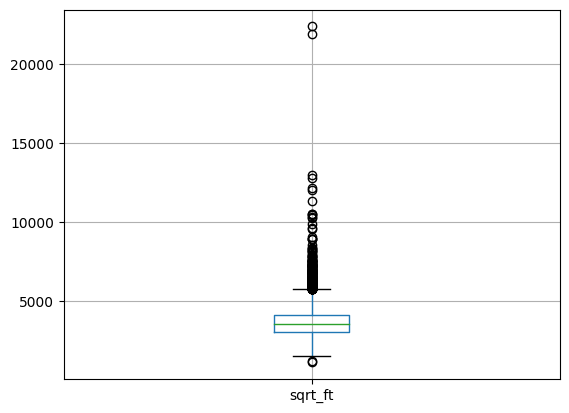

In [ ]:
sqrt_ft_df = pd.to_numeric(df1['sqrt_ft'])
pd.DataFrame(sqrt_ft_df).boxplot()

In [ ]:
pd.DataFrame(sqrt_ft_df).describe()

,sqrt_ft
count,4912.000000
mean,3709.263559
std,1107.498886
min,1100.000000
25%,3047.000000
50%,3508.000000
75%,4123.500000
max,22408.000000


from matplotlib import pyplot as plt
_df_0['sqrt_ft'].plot(kind='hist', bins=20, title='sqrt_ft')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sqrt_ft'].plot(kind='line', figsize=(8, 4), title='sqrt_ft')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df1['bathrooms'] = df1['bathrooms'].astype(float)
df1.sqrt_ft=pd.to_numeric(df1['sqrt_ft'])
# Calculating the correlation between 'bedrooms', 'bathrooms', and 'sqrt_ft'
correlation_data = df1[['bedrooms', 'bathrooms', 'sqrt_ft']].corr()

# Displaying the correlation matrix
correlation_data

,bedrooms,bathrooms,sqrt_ft
bedrooms,1.000000,0.644686,0.607757
bathrooms,0.644686,1.000000,0.710366
sqrt_ft,0.607757,0.710366,1.000000


In [ ]:
def optimize_sqrt_ft(df):
    # Convert 'sqrt_ft' to numeric, coercing errors to NaN
    df['sqrt_ft'] = pd.to_numeric(df['sqrt_ft'], errors='coerce')

    # Grouping by 'bedrooms' and 'bathrooms' and computing the mean 'sqrt_ft' for each group
    grouped_means = df.groupby(['bedrooms', 'bathrooms'])['sqrt_ft'].mean()

    # Use group means to fill NaN values in 'sqrt_ft'
    df['sqrt_ft'] = df.apply(
        lambda row: grouped_means[row['bedrooms'], row['bathrooms']]
                   if pd.isna(row['sqrt_ft']) else row['sqrt_ft'],
        axis=1
    )

    # Calculate the median of 'sqrt_ft' and replace remaining null values
    median_sqrt_ft = df['sqrt_ft'].median()
    df['sqrt_ft'].fillna(median_sqrt_ft, inplace=True)

    return df

# Apply the function to your dataframe
df = optimize_sqrt_ft(df)

In [ ]:
df.sqrt_ft.isnull().sum()

0

<ipython-input-118-985fdb6fed53>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[columns_to_plot].corr()


<Figure size 640x480 with 0 Axes>

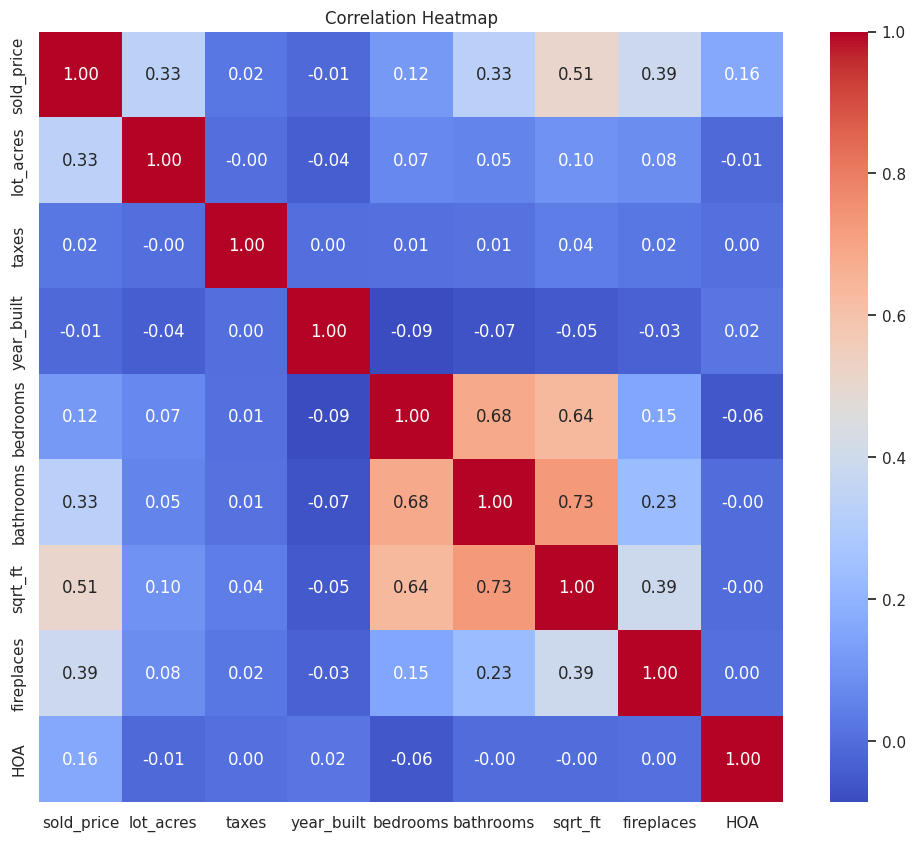

In [ ]:
sns.set(style="whitegrid")
df['bathrooms'] = pd.to_numeric(df['bathrooms']).astype(float)
# Creating a subset of columns for plotting
columns_to_plot = ['sold_price', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA']

plt.tight_layout()
plt.figure(figsize=(12, 10))
# Creating a correlation heatmap for the numerical columns
correlation_matrix = df[columns_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")  
# Save the graph with a DPI of 300
# plt.savefig('./correlation_heatmap.png', dpi=300)

plt.show()

In [ ]:
# Function for preprocessing and Word2Vec modeling
def preprocess_and_word2vec(df, feature_column):
    # Concatenate all feature strings and count feature frequencies
    all_features = ','.join(df[feature_column].dropna())
    feature_counts = pd.Series(all_features.split(',')).value_counts()

    # Tokenize the feature column
    tokenized_features = df[feature_column].dropna().str.split(', ')

    # Train a Word2Vec model
    model = Word2Vec(sentences=tokenized_features, vector_size=100, window=5, min_count=1, workers=4)

    # Vectorize the features using the Word2Vec model
    feature_vectors = tokenized_features.apply(
        lambda x: np.mean([model.wv[word] for word in x if word in model.wv.index_to_key], axis=0)
    )

    # Handle NaN values in feature vectors
    feature_vectors = feature_vectors.dropna()

    return feature_counts, feature_vectors, model

# Function for KMeans clustering and DataFrame update
def kmeans_clustering_and_update(df, feature_vectors, feature_column, num_clusters=10):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(list(feature_vectors))
    clusters = kmeans.labels_

    # Initialize a series with NaNs for cluster assignments
    cluster_series = pd.Series([np.nan] * len(df), index=df.index)

    # Update with actual cluster assignments
    cluster_series[feature_vectors.index] = clusters

    # Add cluster assignments to the DataFrame
    df[f'{feature_column}_cluster'] = cluster_series

    return df

# Apply the functions to 'kitchen_features'
kitchen_feature_counts, kitchen_feature_vectors, kitchen_model = preprocess_and_word2vec(df, 'kitchen_features')
df = kmeans_clustering_and_update(df, kitchen_feature_vectors, 'kitchen_features')

# Apply the functions to 'floor_covering'
floor_feature_counts, floor_feature_vectors, floor_model = preprocess_and_word2vec(df, 'floor_covering')
df = kmeans_clustering_and_update(df, floor_feature_vectors, 'floor_covering')

# Display the first few rows of the updated DataFrame
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,years_since_built,kitchen_features_cluster,floor_covering_cluster
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.00000,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,78,7.0,2.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.00000,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,22,3.0,5.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,2678.59434,0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.0,22,3.0,6.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.00000,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.0,89,6.0,2.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.00000,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,24,1.0,1.0
